# Problem Statement

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Target Variable

fraud_reported :

Y-YES / N-NO

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df= pd.read_csv('Claim.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
pd. set_option('display.max_columns',None)

In [4]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


The dataset contains both categorical and numerical data. Many columns seem to have '?' as value which needs to be handled before training the model

In [5]:
df.shape

(1000, 40)

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
#check For Unique Values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Policy number and Incident Location has 1000 different values and are mere identification number, So dropping these columns. Also _c39 has no values in it, so dropping it.

In [9]:
df.drop(['policy_number', 'incident_location', '_c39'], axis=1, inplace=True)

In [10]:
df.shape

(1000, 37)

# Data Exploration

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

# Check For Null Values

In [12]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

<AxesSubplot:>

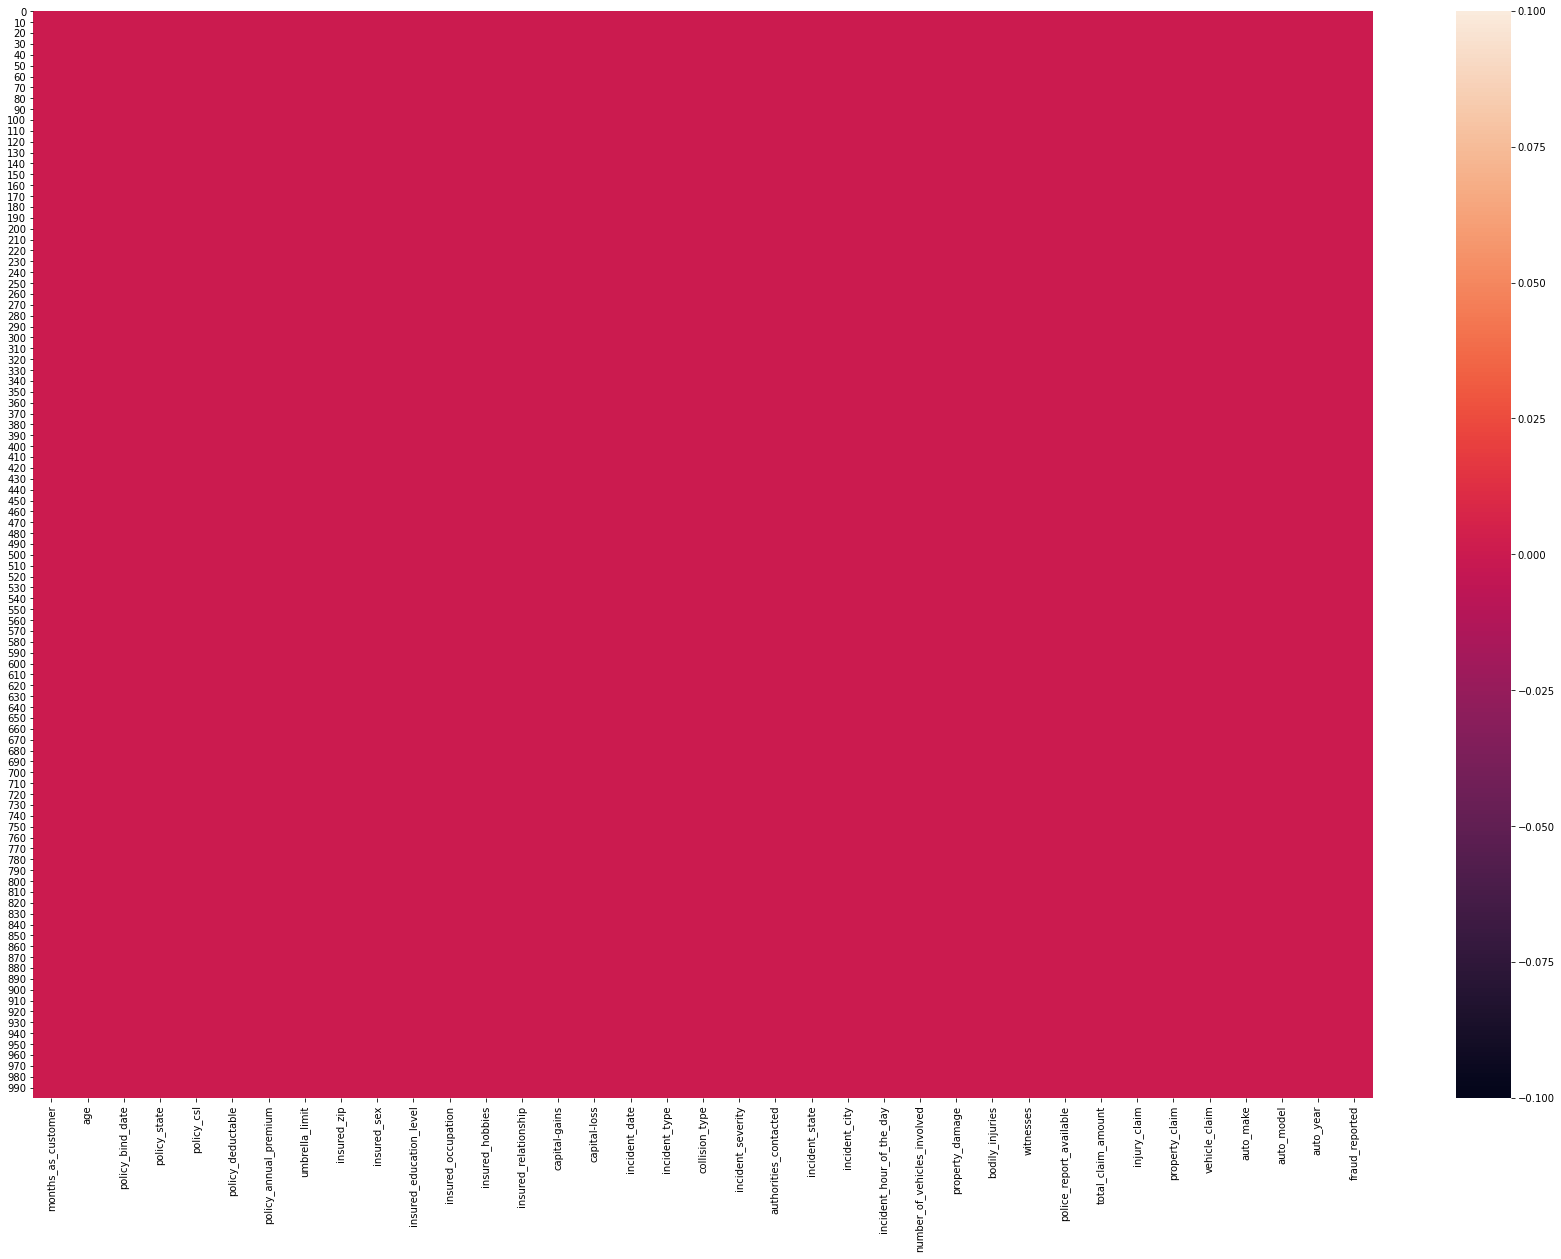

In [13]:
plt.figure(figsize=(30,20))
sns.heatmap(df.isnull())

There are no null values in the dataset, so we shall proceed with further analysis

# Categorical Columns

In [14]:
cat_columns= [x for x in df.dtypes.index if df.dtypes[x] =='object']
cat_columns

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

# Numerical Columns

In [15]:
num_columns= [x for x in df.dtypes.index if df.dtypes[x]=='int64' or df.dtypes[x]=='float64']
num_columns

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

Seperation of columns is important for pre processing of data. Only numerical columns require preprocessing.

# Analyse The Target Variable

In [16]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

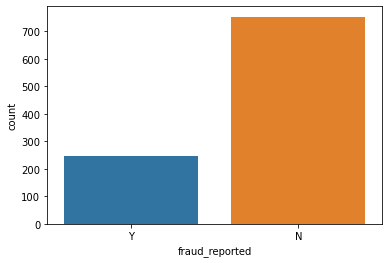

In [17]:
sns.countplot(df['fraud_reported'])

Around 75% data says that No fraud claim however 25% claims are reported to be fraud.

Also there is imbalance in the class so we shall handle it.

In [18]:
# checking the values of each categorical columns
for i in cat_columns:
    print(i,"\n",df[i].value_counts(),"\n")
    print('*' * 100)

policy_bind_date 
 28-04-1992    3
05-08-1992    3
01-01-2006    3
09-08-2004    2
28-12-2002    2
             ..
04-07-2013    1
12-01-2012    1
17-03-1990    1
10-11-1992    1
05-05-1993    1
Name: policy_bind_date, Length: 951, dtype: int64 

****************************************************************************************************
policy_state 
 OH    352
IL    338
IN    310
Name: policy_state, dtype: int64 

****************************************************************************************************
policy_csl 
 250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64 

****************************************************************************************************
insured_sex 
 FEMALE    537
MALE      463
Name: insured_sex, dtype: int64 

****************************************************************************************************
insured_education_level 
 JD             161
High School    160
Associate      145
MD             1

policy_bind_date and incident_date has date related data
These two columns are marked as object data type but they hold date related information and needs to be handled.

collision_type, 
property_damage,
police_report_available have "?" as values in it, which needs to be replaced with either mean, madian or mode depending on its dtype

Data pre processing

In [19]:
# separating the Date column 
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['Day'] = df['policy_bind_date'].dt.day
df['Month'] = df['policy_bind_date'].dt.month
df['Year'] = df['policy_bind_date'].dt.year

In [20]:
# separating the Date column 
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_Day'] = df['incident_date'].dt.day
df['incident_Month'] = df['incident_date'].dt.month
df['incident_Year'] = df['incident_date'].dt.year

In [21]:
#Drop the initial date columns
df.drop(columns = ['policy_bind_date','incident_date'], axis=1, inplace=True)

# Replace & fill Missing values

In [22]:
#replace '?' with nan
df=df.replace('?', np.nan)

In [23]:
# checking the missing value, that how many colums have actully missing value
null_val ={}
for i in df.columns:
    if df[i].isnull().sum() >0:
        null_val[i] = df[i].isnull().sum()
print(null_val)

{'collision_type': 178, 'property_damage': 360, 'police_report_available': 343}


In [24]:
# We will fill '?' with mode values 

df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])   

df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
 

In [25]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Day,Month,Year,incident_Day,incident_Month,incident_Year
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,9,6,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,1,10,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N,16,7,1991,22,2,2015
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N,1,5,2014,24,1,2015
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,17,2,2003,23,1,2015
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,NO,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,18,11,2011,26,2,2015


Incident Year column has single value throughout, so dropping the columns

In [26]:
df.drop(['incident_Year'], axis=1, inplace=True)

# Visualization

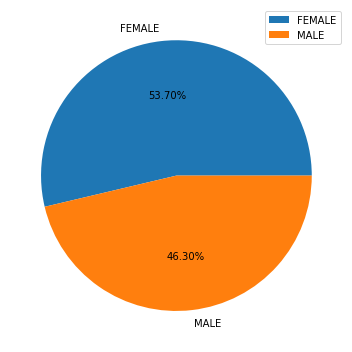

In [27]:
plt.figure(figsize=(10,5))
plt.pie(df['insured_sex'].value_counts(), labels=df['insured_sex'].value_counts().index, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.tight_layout()
plt.show()

we can see that the data coverage for female is a bit higher than their male couterparts

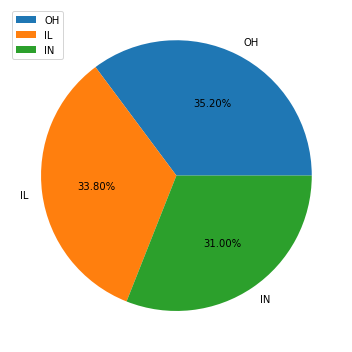

In [28]:
plt.figure(figsize=(10,5))
plt.pie(df['policy_state'].value_counts(), labels=df['policy_state'].value_counts().index, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.tight_layout()
plt.show()

The policy state OHIO has a larger data as compared to Illinois and Indiana but all 3 have pretty much similar data points

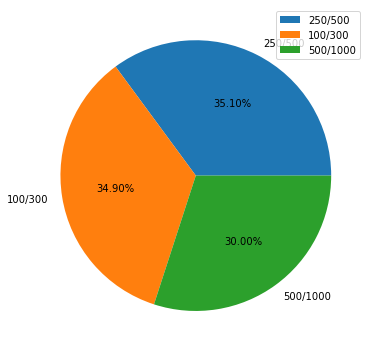

In [29]:
plt.figure(figsize=(10,5))
plt.pie(df['policy_csl'].value_counts(), labels=df['policy_csl'].value_counts().index, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.tight_layout()
plt.show()

The policy sections shows that 250/500 category has a slighty higher data coverage than the 100-300 and 500/1000 categories

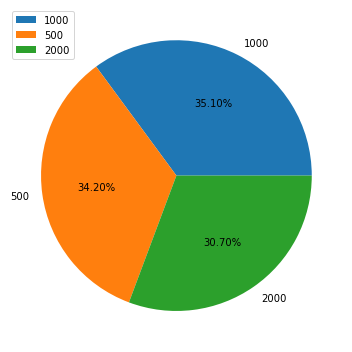

In [30]:
plt.figure(figsize=(10,5))
plt.pie(df['policy_deductable'].value_counts(), labels=df['policy_deductable'].value_counts().index, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.tight_layout()
plt.show()

For policy deductable criteria we can see 1000 to be at a higher rate than it's 500 and 2000 data counterparts

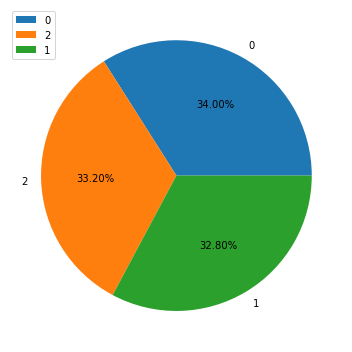

In [31]:
plt.figure(figsize=(10,5))
plt.pie(df['bodily_injuries'].value_counts(), labels=df['bodily_injuries'].value_counts().index, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.tight_layout()
plt.show()

In this plot bodily injueries the severity for level 0 is slightly higher than the level 2 and 1

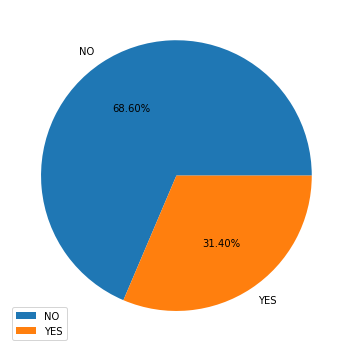

In [32]:
plt.figure(figsize=(10,5))
plt.pie(df['police_report_available'].value_counts(), labels=df['police_report_available'].value_counts().index, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.tight_layout()
plt.show()

Only 31.40 percent people were able to produce genuine reports while the remaining 34.30 percent were either unable to show a report.

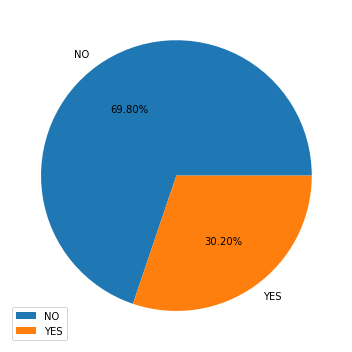

In [33]:
plt.figure(figsize=(10,5))
plt.pie(df['property_damage'].value_counts(), labels=df['property_damage'].value_counts().index, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.tight_layout()
plt.show()

With property damage we see that 70% of people did not face any property damage so only 30.20 percent people suffered from property damage

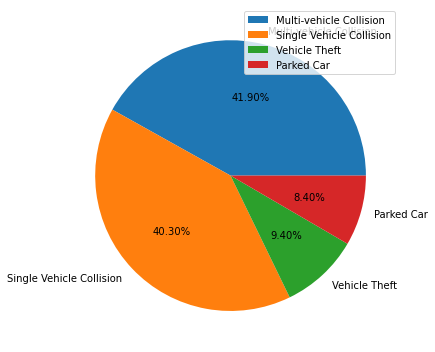

In [34]:
plt.figure(figsize=(10,5))
plt.pie(df['incident_type'].value_counts(), labels=df['incident_type'].value_counts().index, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.tight_layout()
plt.show()

when we check for accident type then single vehicle and multi vehicle collisions have covered more than 40 percent data.

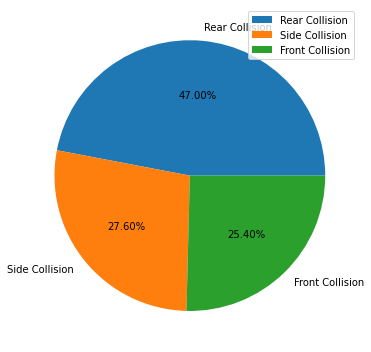

In [35]:
plt.figure(figsize=(10,5))
plt.pie(df['collision_type'].value_counts(), labels=df['collision_type'].value_counts().index, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.tight_layout()
plt.show()

Here, we see 29.20 percent incident vehicles with rear collision is the highest than others.

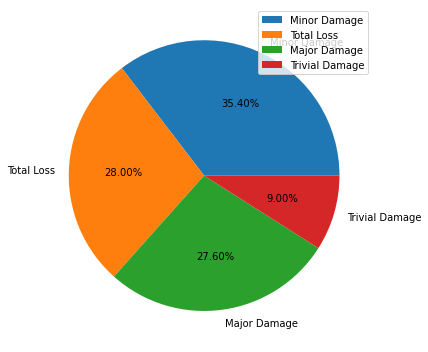

In [36]:
plt.figure(figsize=(10,5))
plt.pie(df['incident_severity'].value_counts(), labels=df['incident_severity'].value_counts().index, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.tight_layout()
plt.show()

With the incident severity the highest category covers for minor damages with 35.40 percent and lowest number is of 9 percent.

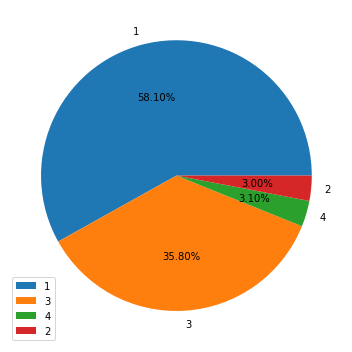

In [37]:
plt.figure(figsize=(10,5))
plt.pie(df['number_of_vehicles_involved'].value_counts(), labels=df['number_of_vehicles_involved'].value_counts().index, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.tight_layout()
plt.show()

The number of vehicles being involved in an incident majorly lies between 1 and 3

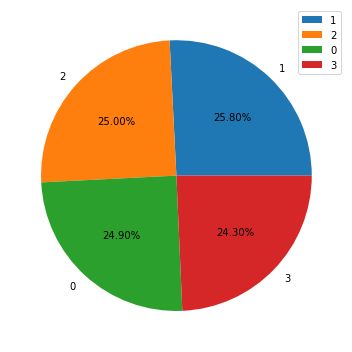

In [38]:
plt.figure(figsize=(10,5))
plt.pie(df['witnesses'].value_counts(), labels=df['witnesses'].value_counts().index, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.tight_layout()
plt.show()

Here, all the  witnesses are almost similarly distributed

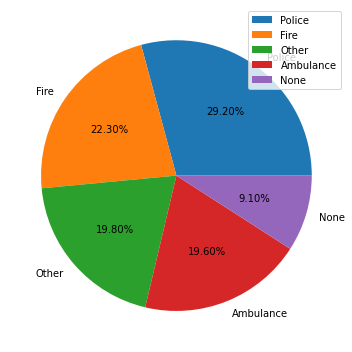

In [39]:
plt.figure(figsize=(10,5))
plt.pie(df['authorities_contacted'].value_counts(), labels=df['authorities_contacted'].value_counts().index, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.tight_layout()
plt.show()

The police being notified the most then the fire brigade and ambulances after an accident.

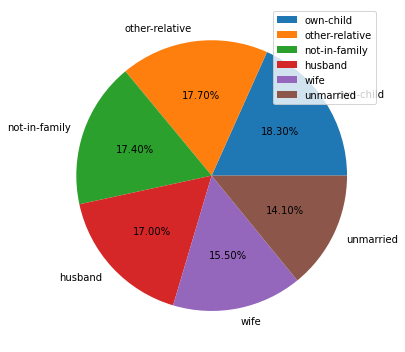

In [40]:
plt.figure(figsize=(10,5))
plt.pie(df['insured_relationship'].value_counts(), labels=df['insured_relationship'].value_counts().index, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.tight_layout()
plt.show()

In this column we see almost all the categorical value equally distributed.

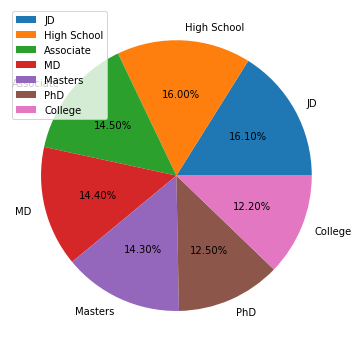

In [41]:
plt.figure(figsize=(10,5))
plt.pie(df['insured_education_level'].value_counts(), labels=df['insured_education_level'].value_counts().index, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.tight_layout()
plt.show()

Insured education level column has the data distributed equally amongst all the categorical values it holds

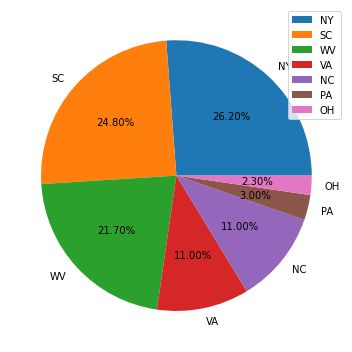

In [42]:
plt.figure(figsize=(10,5))
plt.pie(df['incident_state'].value_counts(), labels=df['incident_state'].value_counts().index, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.tight_layout()
plt.show()

We see major portion of data rows are covered by New York, South Carolina and West Virginia states

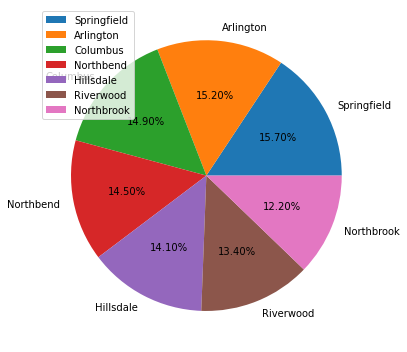

In [43]:
plt.figure(figsize=(10,5))
plt.pie(df['incident_city'].value_counts(), labels=df['incident_city'].value_counts().index, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.tight_layout()
plt.show()

All the cities that are listed in the column have an equal share of data coverage

Double digit category column name: umbrella_limit


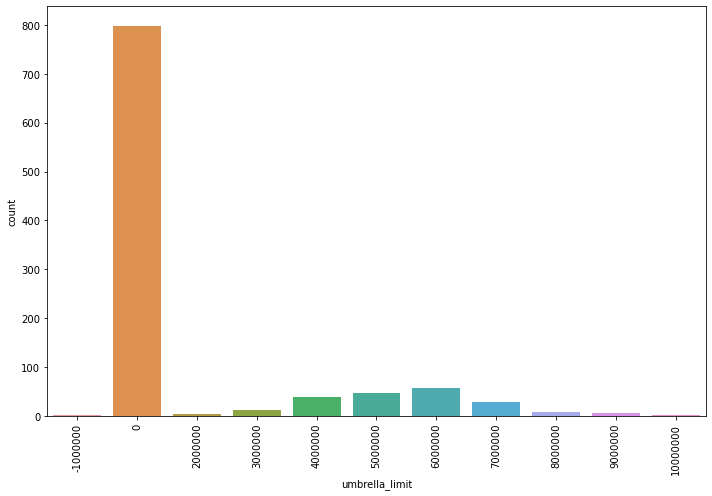

Double digit category column name: insured_occupation


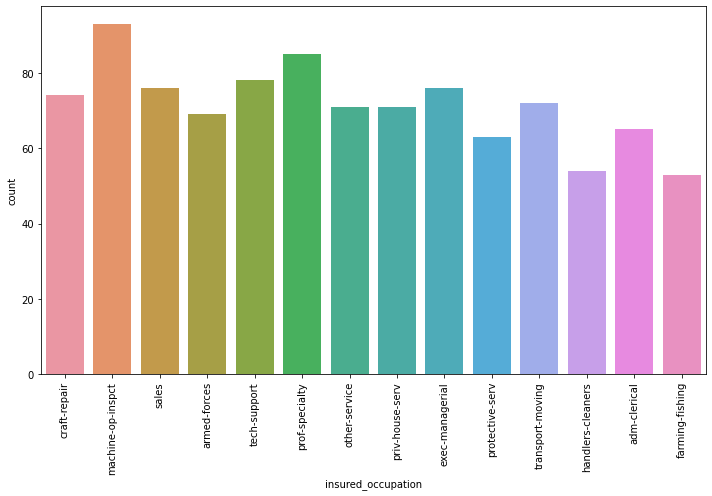

Double digit category column name: auto_make


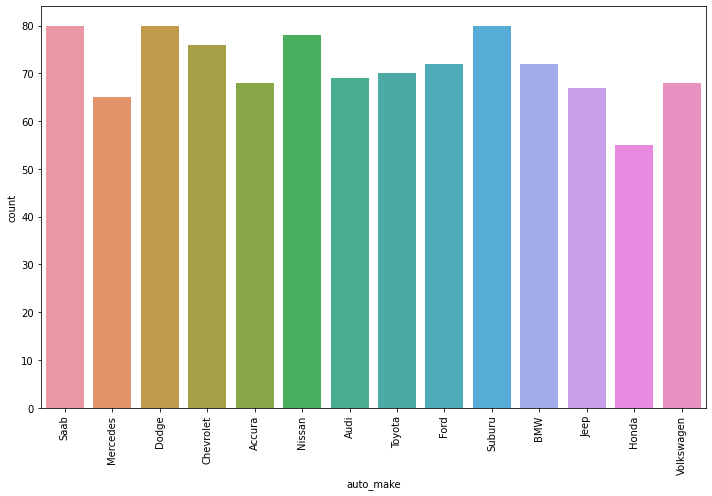

Double digit category column name: insured_hobbies


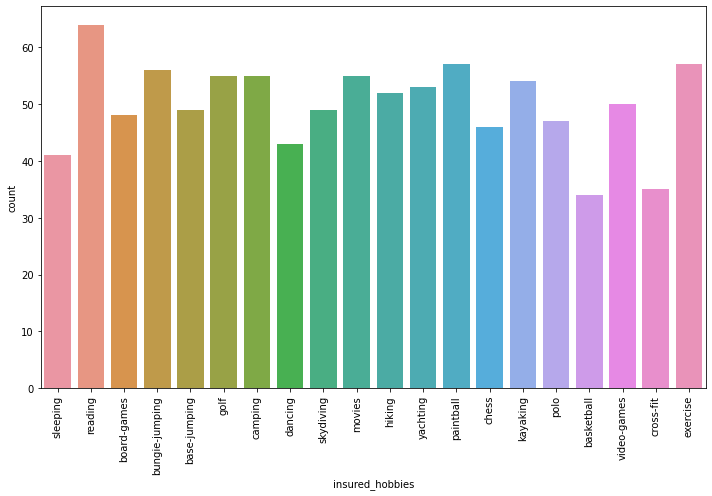

Double digit category column name: auto_model


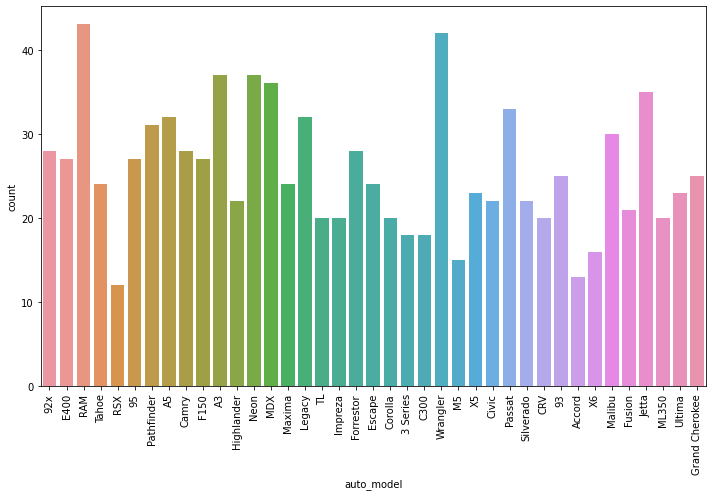

In [44]:
def countplot(x):
    plt.figure(figsize=(10,7))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

col2 = ['umbrella_limit', 'insured_occupation', 'auto_make', 'insured_hobbies', 'auto_model']

for j in df[col2]:
    print(f"Double digit category column name:", j)
    countplot(df[j])

The umbrella limit is the highest for the number 0 than any other value listed in that column.

For occupation of all the insured people we see the highest data coverage by machine operation inspector and professional speciality designations.

we see a higher scale of data for saab, dodge, nissan, suburu and volkswagen.

Listeing to hobbies held by insured people has the highest data coverage on reading.

if we take a look at the vehicle models that were registered for incidents then we see lots of data rows covered by RAM and Wrangler automobile models.

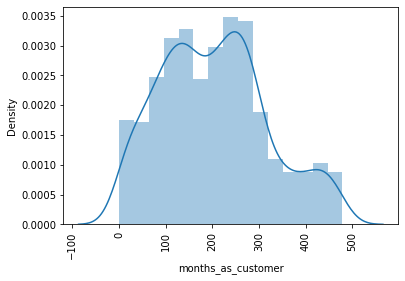

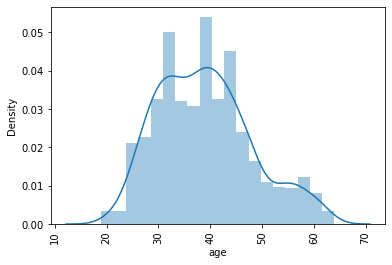

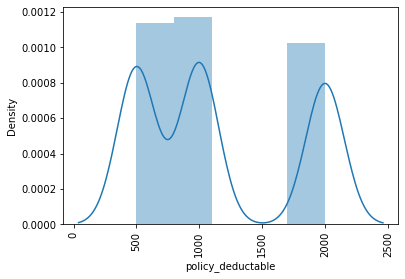

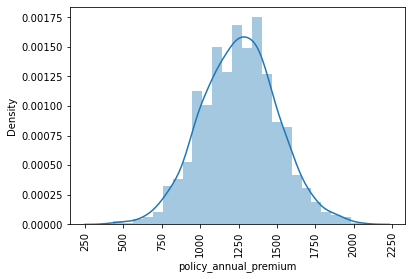

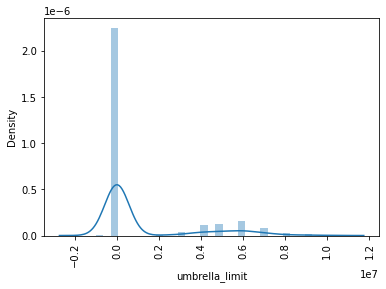

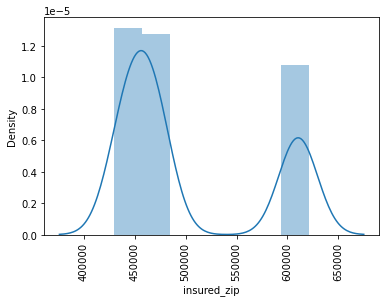

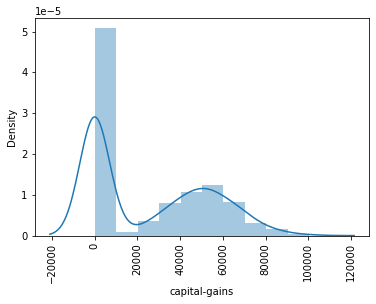

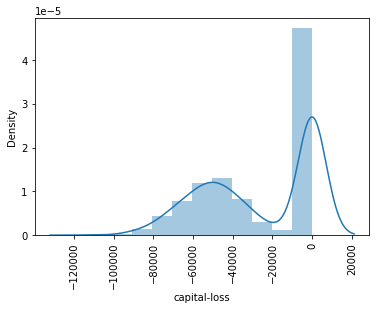

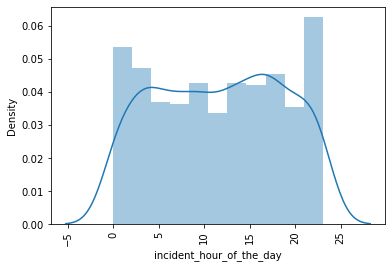

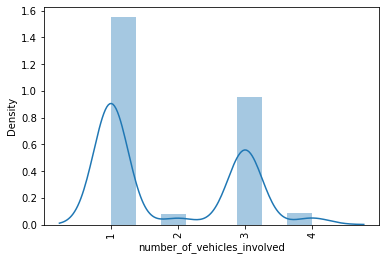

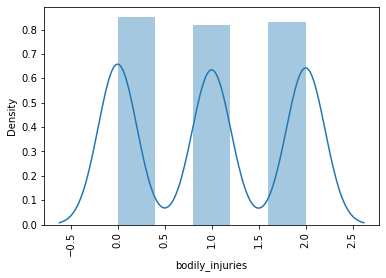

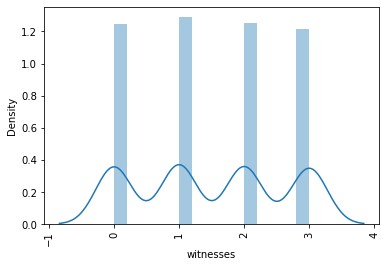

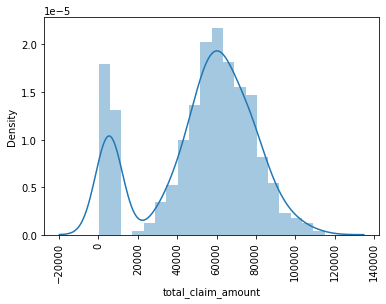

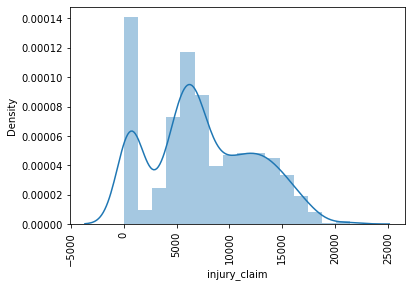

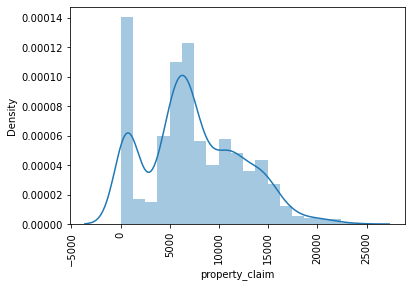

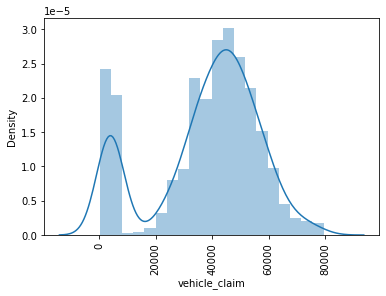

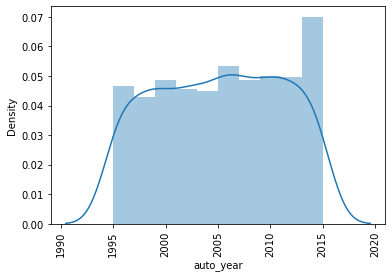

In [45]:
for i in num_columns:
    
    plt.xticks(rotation=90)
    sns.distplot(df[i],kde=True)
    plt.show()

This plot shows the distribution of numerical columns.

# Encode The Categorical Data

In [46]:
LE= LabelEncoder()

In [47]:
cat_columns

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [48]:
cat_columns.remove('policy_bind_date')

In [49]:
cat_columns.remove('incident_date')

In [50]:
cat_columns

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [51]:
for i in cat_columns:
    df[i]= LE.fit_transform(df[i])

In [52]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Day,Month,Year,incident_Day,incident_Month
0,328,48,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1,17,10,2014,25,1
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1,27,6,2006,21,1
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0,9,6,2000,22,2
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1,25,5,1990,1,10
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0,6,6,2014,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,2,0,1,1,0,4,20,1,1,0,1,0,87200,17440,8720,61040,6,6,2006,0,16,7,1991,22,2
996,285,41,0,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,2,1,0,1,4,3,23,1,1,2,3,0,108480,18080,18080,72320,13,28,2015,0,1,5,2014,24,1
997,130,34,2,1,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,0,2,1,4,0,0,4,3,0,2,3,1,67500,7500,7500,52500,11,19,1996,0,17,2,2003,23,1
998,458,62,0,2,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,2,1,0,3,1,0,2,1,0,0,1,1,46980,5220,5220,36540,1,5,1998,0,18,11,2011,26,2


In [53]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

# Data Description

In [54]:
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Day,Month,Year,incident_Day,incident_Month
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,1.172000,1.022000,1.184000,2.167000,3.242000,2.966000,11.644000,1.83900,0.302000,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000,15.448000,6.559000,2001.604000,13.08400,3.407000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,1.081474,0.728043,0.939695,1.532142,2.155942,2.044266,6.951373,1.01888,0.459355,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483,8.850176,3.391758,7.360391,10.44318,3.276291
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000,1.000000,1.000000,1990.000000,1.00000,1.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000,8.000000,4.000000,1995.000000,2.00000,1.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,12.000000,1.00000,0.000000,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000,16.000000,7.000000,2002.000000,15.00000,2.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,2.000000,2.000000,2.000000,4.000000,5.000000,5.000000,17.000000,3.00000,1.000000,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000,23.000000,9.000000,2008.000000,22.00000,5.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,3.000000,2.000000,3.000000,4.000000,6.000000,6.000000,23.000000,4.00000,1.000000,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000,31.000000,12.000000,2015.000000,31.00000,12.000000


Certain columns have outliers which can be handled with quartile.

# Correlation

In [55]:
df.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Day,Month,Year,incident_Day,incident_Month
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.017377,-0.072787,-0.059581,0.010021,0.005369,-0.000130,0.070639,0.014736,0.005488,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544,0.051728,0.005750,-0.048276,-0.011092,0.024659
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,-0.025626,-0.075642,-0.058439,0.015417,0.005770,-0.002291,0.087161,0.022102,-0.003408,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143,0.053869,0.015501,-0.037444,-0.006131,0.023404
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.031848,0.052438,-0.026377,-0.016777,0.008723,-0.002077,0.029457,-0.042263,-0.008465,0.013384,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432,0.002277,0.071450,-0.007276,0.014745,0.023643
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,0.015788,-0.005960,-0.030063,0.005249,-0.034612,0.011997,0.020641,0.022530,0.056182,0.032814,0.009333,-0.001869,-0.019403,-0.027634,-0.000595,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,0.018973,-0.045345,-0.016466,-0.004156,-0.011794
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.038411,-0.053912,-0.015711,-0.000760,0.006517,-0.045117,0.060935,0.051214,0.015770,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817,0.009164,-0.050416,-0.049598,-0.018160,-0.006418
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.053603,0.036556,-0.011155,-0.055191,0.046434,0.048724,-0.001578,-0.045991,0.080738,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480,-0.025183,-0.035355,0.001249,0.014835,0.021559
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,0.015966,0.010041,0.009466,0.029044,-0.077492,0.013094,-0.023257,-0.021270,-0.076358,0.022743,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622,-0.045207,0.009961,0.048008,-0.021716,0.042409
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,-0.069077,0.002106,-0.002355,0.006303,0.049372,-0.010840,-0.016882,-0.023855,-0.017548,-0.047669,-0.017532,0.008274,0.027448,0.023861,0.028695,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368,-0.039867,0.015864,-0.001100,0.019095,0.005461
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,-0.006160,-0.020317,0.002855,-0.020494,-0.021705,0.009952,-0.014293,-0.028168,0.017914,-0.022379,0.014470,0.019290,0.018793,0.026969,-0.020297,0.042463,0.006992,-0.

<AxesSubplot:>

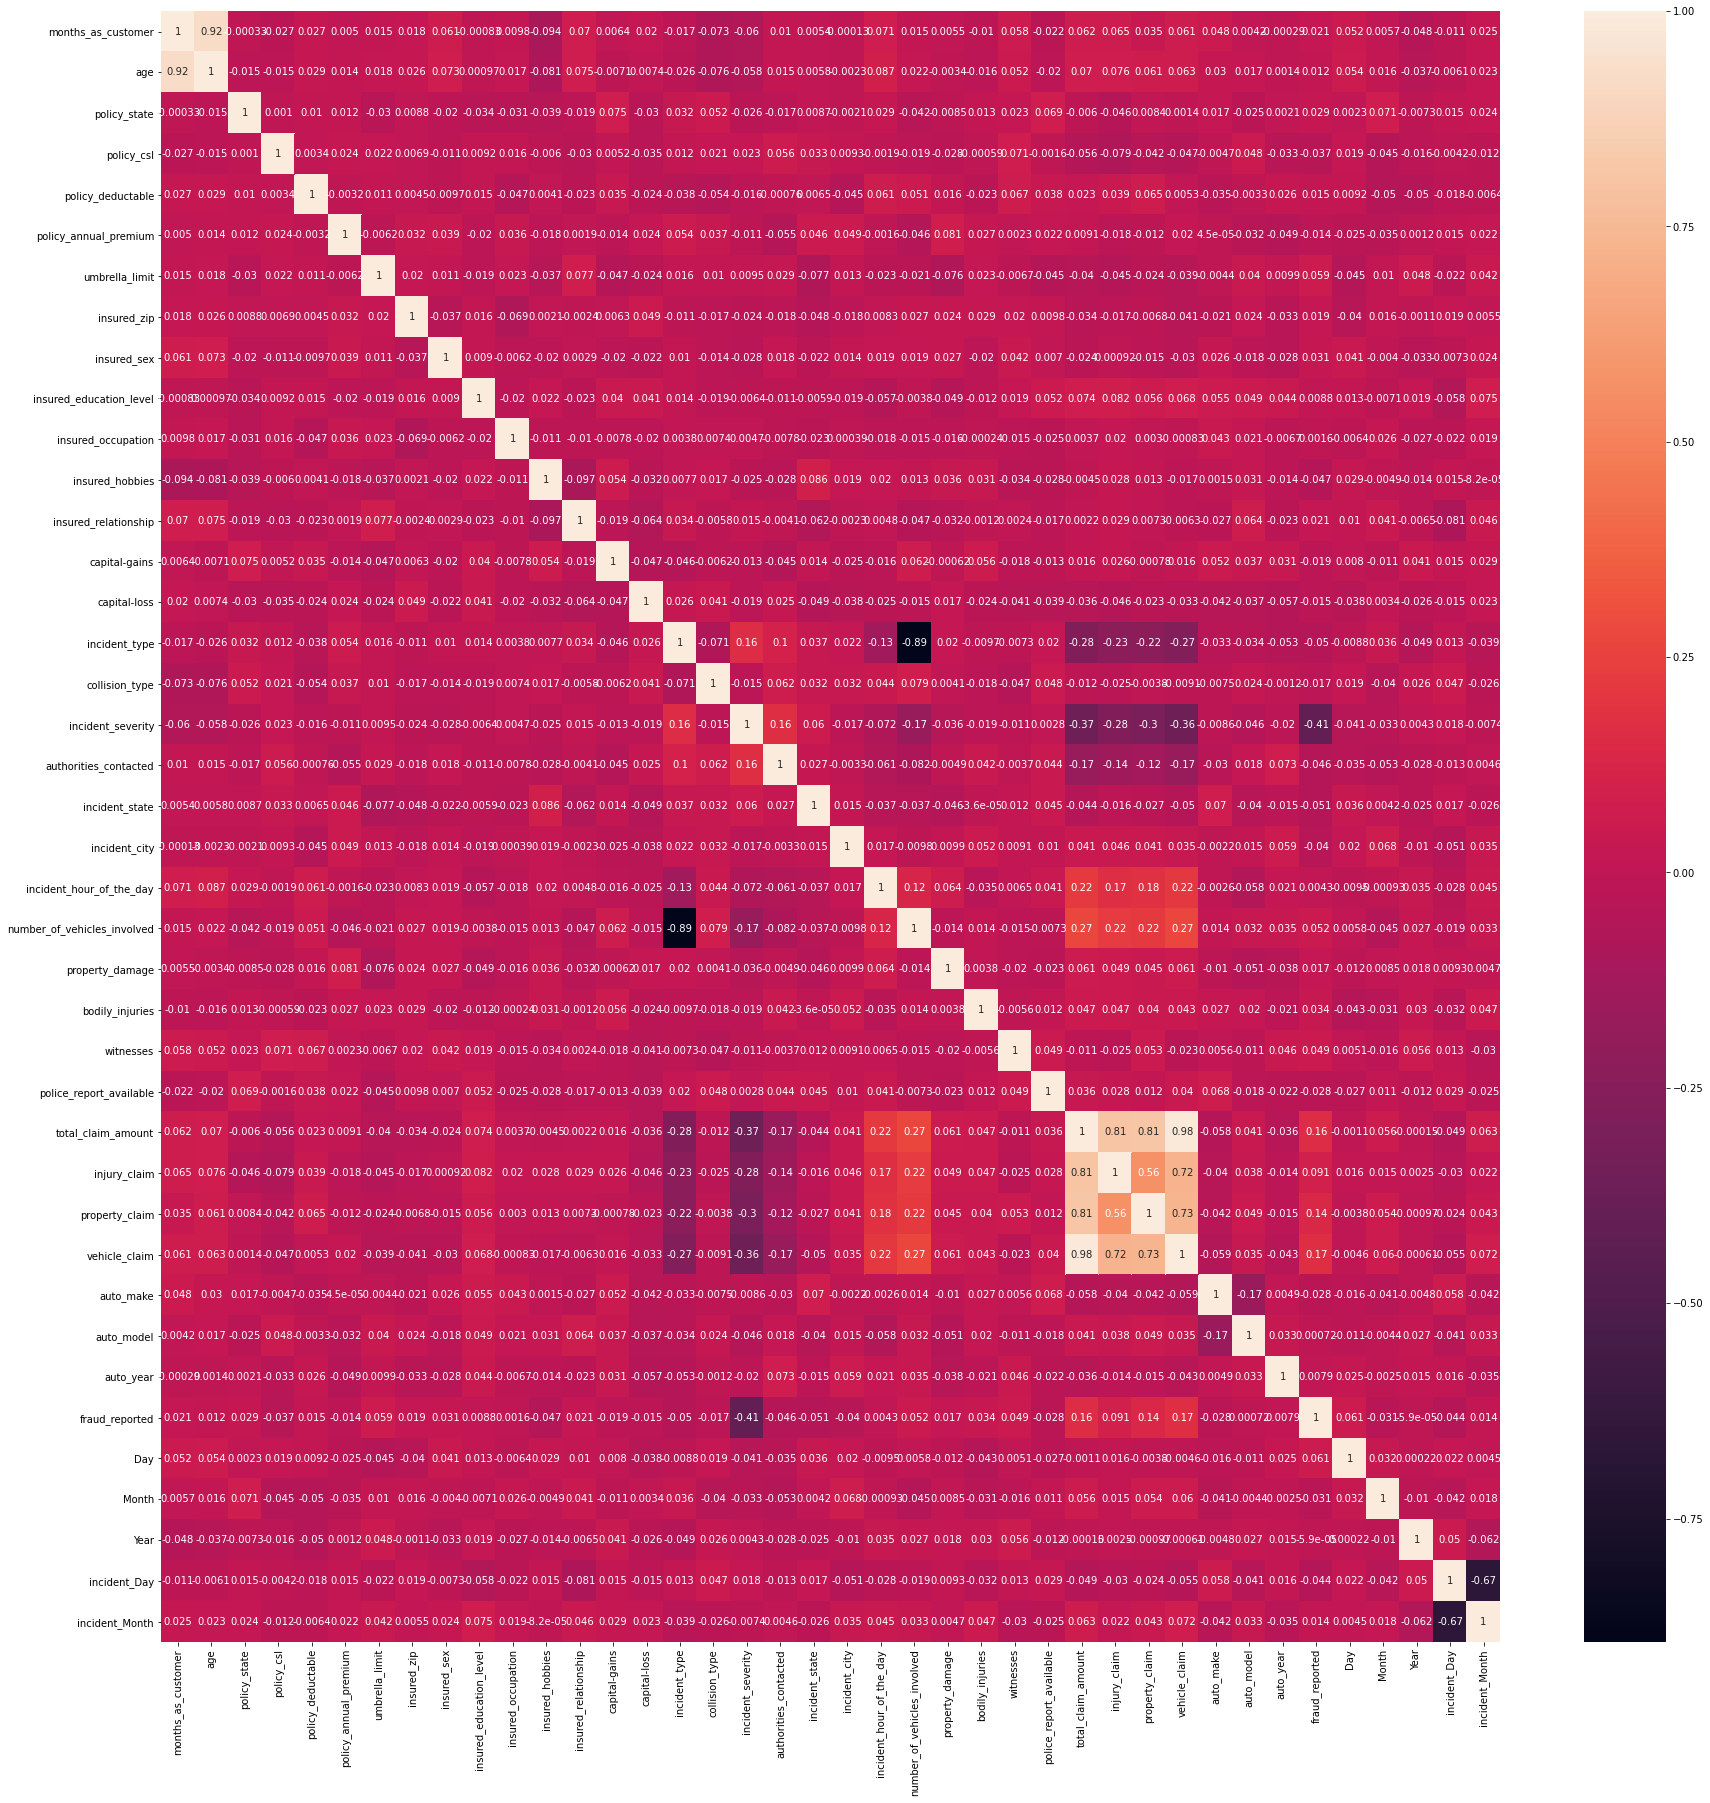

In [56]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot= True)

All the claim columns are correlated to each other. 

Multicollinearity is checked and handled with VIF

# Check For Multi Collinearity- VIF

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
df1=df.drop('fraud_reported', axis=1)

In [59]:
df1

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Day,Month,Year,incident_Day,incident_Month
0,328,48,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,17,10,2014,25,1
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,27,6,2006,21,1
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,9,6,2000,22,2
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,25,5,1990,1,10
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,6,6,2014,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,2,0,1,1,0,4,20,1,1,0,1,0,87200,17440,8720,61040,6,6,2006,16,7,1991,22,2
996,285,41,0,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,2,1,0,1,4,3,23,1,1,2,3,0,108480,18080,18080,72320,13,28,2015,1,5,2014,24,1
997,130,34,2,1,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,0,2,1,4,0,0,4,3,0,2,3,1,67500,7500,7500,52500,11,19,1996,17,2,2003,23,1
998,458,62,0,2,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,2,1,0,3,1,0,2,1,0,0,1,1,46980,5220,5220,36540,1,5,1998,18,11,2011,26,2


In [60]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [61]:
vif_fun()

,vif_factor,features
0,2.838171e+01,months_as_customer
1,1.315644e+02,age
2,2.589746e+00,policy_state
3,2.464198e+00,policy_csl
4,4.639924e+00,policy_deductable
5,2.859944e+01,policy_annual_premium
6,1.275432e+00,umbrella_limit
7,5.131293e+01,insured_zip
8,1.913504e+00,insured_sex
9,3.466007e+00,insured_education_level


Total_claim, injury_claim, property_claim, vechicle_claim has multicollinerity, in which vechicle claim contributes more to the target. So dropping other columns

In [62]:
df1.drop(['total_claim_amount', 'injury_claim', 'property_claim'], axis=1, inplace=True)

In [63]:
vif_fun()

,vif_factor,features
0,28.134901,months_as_customer
1,130.436502,age
2,2.580461,policy_state
3,2.452580,policy_csl
4,4.597830,policy_deductable
5,28.488609,policy_annual_premium
6,1.274723,umbrella_limit
7,51.243680,insured_zip
8,1.911463,insured_sex
9,3.456700,insured_education_level


auto_year and Year has high collinearity, in which auto_year contributes more to target, so dropping year column.

In [64]:
df1.drop(['Year'], axis=1, inplace=True)

In [65]:
vif_fun()

,vif_factor,features
0,28.097882,months_as_customer
1,130.352910,age
2,2.580341,policy_state
3,2.452232,policy_csl
4,4.584063,policy_deductable
5,28.457719,policy_annual_premium
6,1.272775,umbrella_limit
7,51.207251,insured_zip
8,1.911454,insured_sex
9,3.456398,insured_education_level


Among auto_year and age, age has high contribution to target so dropping auto_year

In [66]:
df1.drop(['auto_year'], axis=1, inplace=True)

In [67]:
vif_fun()

,vif_factor,features
0,24.519065,months_as_customer
1,107.126081,age
2,2.560314,policy_state
3,2.445415,policy_csl
4,4.509689,policy_deductable
5,25.875316,policy_annual_premium
6,1.271961,umbrella_limit
7,40.571885,insured_zip
8,1.910793,insured_sex
9,3.437109,insured_education_level


Among months_as_customer and policy_annual_premium, policy_annual_premium has less contribution to target so dropping it.

In [68]:
df1.drop(['policy_annual_premium'], axis=1, inplace=True)

In [69]:
vif_fun()

,vif_factor,features
0,23.961144,months_as_customer
1,103.546034,age
2,2.556545,policy_state
3,2.439891,policy_csl
4,4.500416,policy_deductable
5,1.271896,umbrella_limit
6,38.854239,insured_zip
7,1.906244,insured_sex
8,3.437072,insured_education_level
9,3.715357,insured_occupation


In [70]:
df1['fraud_reported']=df['fraud_reported']

In [71]:
df2=df1

In [72]:
df2

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim,auto_make,auto_model,Day,Month,incident_Day,incident_Month,fraud_reported
0,328,48,2,1,1000,0,466132,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,52080,10,1,17,10,25,1,1
1,228,42,1,1,2000,5000000,468176,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,3510,8,12,27,6,21,1,1
2,134,29,2,0,2000,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,23100,4,30,9,6,22,2,0
3,256,41,0,1,2000,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,50720,3,34,25,5,1,10,1
4,228,44,0,2,1000,6000000,610706,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,4550,0,31,6,6,17,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,0,431289,0,5,2,13,4,0,0,2,0,1,1,0,4,20,1,1,0,1,0,61040,6,6,16,7,22,2,0
996,285,41,0,0,1000,0,608177,0,6,9,17,5,70900,0,2,1,0,1,4,3,23,1,1,2,3,0,72320,13,28,1,5,24,1,0
997,130,34,2,1,500,3000000,442797,0,5,1,3,2,35100,0,0,2,1,4,0,0,4,3,0,2,3,1,52500,11,19,17,2,23,1,0
998,458,62,0,2,2000,5000000,441714,1,0,5,0,5,0,0,2,1,0,3,1,0,2,1,0,0,1,1,36540,1,5,18,11,26,2,0


# Check For Skewness

In [73]:
df1.skew().sort_values(ascending=False)

umbrella_limit                 1.806712
incident_Month                 1.375894
fraud_reported                 1.175051
property_damage                0.863806
insured_zip                    0.816554
police_report_available        0.802728
number_of_vehicles_involved    0.502664
age                            0.478988
capital-gains                  0.478850
policy_deductable              0.477887
months_as_customer             0.362177
incident_severity              0.279016
insured_sex                    0.148630
incident_type                  0.101507
policy_csl                     0.088928
insured_relationship           0.077488
incident_Day                   0.059111
incident_city                  0.049531
Day                            0.024372
witnesses                      0.019636
bodily_injuries                0.014777
insured_education_level       -0.000148
auto_make                     -0.018797
policy_state                  -0.026177
Month                         -0.029321


In [74]:
df1.drop(['fraud_reported'], axis=1, inplace=True)

We can see certain columns with skewness above the limit of +/-0.5. We can handle them for numeric columns alone, as categorical columns have no impact on it

In [75]:
from sklearn.preprocessing import power_transform
df1_new= power_transform(df1)

In [76]:
df1['fraud_reported']= df['fraud_reported']

# Check For Outliers

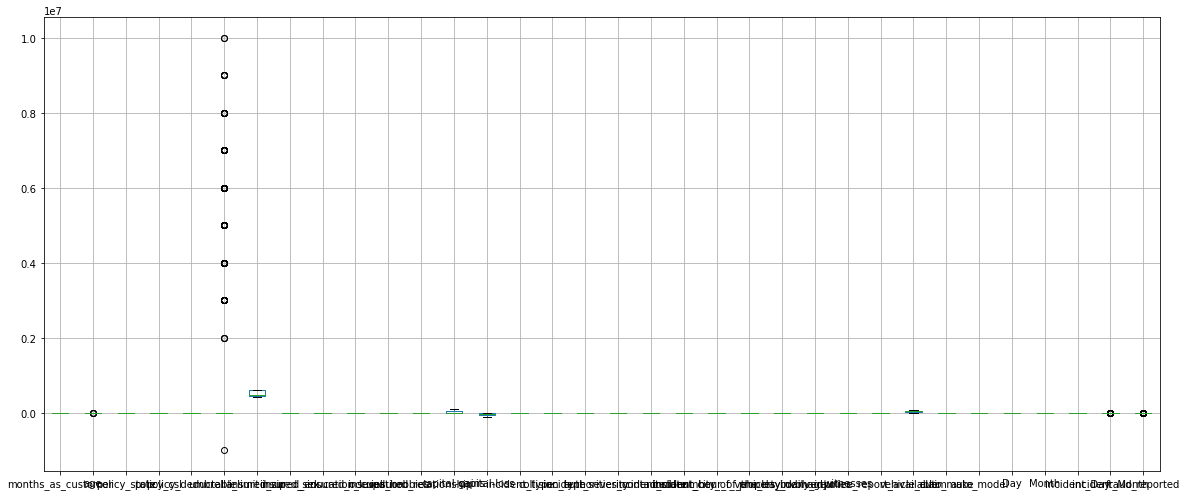

In [77]:
df1.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

There may be posibility of outliers in certain columns. we shall handle it.

In [78]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.07813958, 0.99083647, 1.18717314, ..., 1.14160272, 0.73503976,
        1.74601919],
       [0.2089946 , 0.33407345, 0.01685641, ..., 0.75838596, 0.73503976,
        1.74601919],
       [0.60800168, 1.08891308, 1.18717314, ..., 0.85419015, 0.42966387,
        0.57273139],
       ...,
       [0.64276748, 0.54161057, 1.18717314, ..., 0.94999434, 0.73503976,
        0.57273139],
       [2.20802805, 2.52328351, 1.22088596, ..., 1.23740691, 0.42966387,
        0.57273139],
       [2.19064515, 2.3043625 , 1.18717314, ..., 1.23740691, 0.42966387,
        0.57273139]])

In [79]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 262, 314, 430, 458, 503, 657, 700, 807,
       875, 922, 975], dtype=int64), array([ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 13,  5,  5,  5],
      dtype=int64))


In [80]:
df_new= df1[(z<3).all(axis=1)]

In [81]:
df_new.shape

(984, 34)

In [82]:
df1.shape

(1000, 34)

In [83]:
#Loss
loss= (1000-984)/ 1000*100
loss

1.6

Very less percent of the data is lost. So we shall proceed with Model Training

# Spliting the data and Balancing

In [84]:
x= df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [85]:
y.value_counts()

0    743
1    241
Name: fraud_reported, dtype: int64

The target variable is highly imbalanced which may affect lead to biasing and low performance. So we shall balance it with SMOTE

In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
sm=SMOTE()
x1,y1= sm.fit_resample(x,y)

In [88]:
y1.value_counts()

0    743
1    743
Name: fraud_reported, dtype: int64

Now the model is balanced. So we will proceed to train the model

Since the Target variable is categorical with only 2 classes, we use LogisticRegression models to train our data

# Scaling of Features

In [89]:
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)
x1.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim,auto_make,auto_model,Day,Month,incident_Day,incident_Month
0,1.094840,1.030885,1.341001,0.275745,-0.222901,-0.486216,-0.495567,1.291458,0.639199,-1.178489,1.414803,-1.453209,1.046035,0.975921,0.944938,1.552364,-0.942136,1.349811,0.476661,-0.898800,-1.014445,-0.832791,1.755682,0.140118,0.564571,1.749317,0.712091,0.976407,-1.721582,0.158084,1.148195,1.283650,-0.748728
1,0.190290,0.348020,0.089288,0.275745,1.502232,1.824498,-0.466474,1.291458,0.639199,-0.136553,1.044369,-0.190731,-0.903859,0.975921,1.921417,0.138009,0.133144,1.349811,0.972683,1.154416,-0.554992,-0.832791,-0.569579,-1.129484,-1.339976,-0.571652,-2.113687,0.451180,-0.668678,1.332058,-0.098585,0.875147,-0.748728
2,-0.659986,-1.131523,1.341001,-1.033382,1.502232,1.824498,-1.000849,-0.774319,1.710660,1.165868,-1.363450,0.440508,0.380218,0.975921,-1.008021,0.138009,0.133144,1.349811,-1.011403,-0.898800,-0.708143,1.277231,-0.569579,1.409719,1.516845,-0.571652,-0.973951,-0.599275,1.054258,-0.781096,-0.098585,0.977273,-0.425952
3,0.443564,0.234209,-1.162425,0.275745,1.502232,2.286641,1.525349,-0.774319,1.710660,-1.438973,-1.363450,1.071747,0.885068,-1.287085,0.944938,-1.276346,-0.942136,1.349811,-0.515382,-1.412104,-1.014445,-0.832791,-0.569579,0.140118,0.564571,-0.571652,0.632967,-0.861889,1.437132,1.097263,-0.410279,-1.167367,2.156258
4,0.190290,0.575641,-1.162425,1.584872,-0.222901,2.286641,1.562199,1.291458,-1.503723,1.165868,-1.363450,1.071747,1.510644,-0.692320,1.921417,0.138009,0.133144,-0.019349,-1.011403,-1.412104,1.282820,-0.832791,-0.569579,-1.129484,-0.387702,-0.571652,-2.053181,-1.649730,1.149976,-1.133288,-0.098585,0.466644,-0.425952


# Train The Model

In [90]:
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Check the best Random State

# LogisticRegression

In [91]:
maxacc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=20,random_state=i)
    lg=LogisticRegression()
    lg.fit(xtrain,ytrain)
    predlg= lg.predict(xtest)
    acc=accuracy_score(ytest,predlg)
    if acc>maxacc:
        maxacc=acc
        maxRS=i
print("Best Accuracy_score is", maxacc, 'on Random_state',maxRS)

Best Accuracy_score is 1.0 on Random_state 96


# To Find the Best Cross Validation Score

In [92]:
pred_tr= lg.predict(xtrain)
pred_ts= lg.predict(xtest)

In [93]:
train_accuracy= accuracy_score(ytrain,pred_tr)
test_accuracy= accuracy_score(ytest,pred_ts)

In [94]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lg,x1,y1,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.7651413189771198 and accuracy score for training is 0.819918144611187 and the accuracy for testing is 0.65


At cross fold 3 the cv score is 0.7578472901053547 and accuracy score for training is 0.819918144611187 and the accuracy for testing is 0.65


At cross fold 4 the cv score is 0.7854172100976726 and accuracy score for training is 0.819918144611187 and the accuracy for testing is 0.65


At cross fold 5 the cv score is 0.7908028834203331 and accuracy score for training is 0.819918144611187 and the accuracy for testing is 0.65


At cross fold 6 the cv score is 0.7881432022985503 and accuracy score for training is 0.819918144611187 and the accuracy for testing is 0.65


At cross fold 7 the cv score is 0.7915701757716108 and accuracy score for training is 0.819918144611187 and the accuracy for testing is 0.65


At cross fold 8 the cv score is 0.7982345248474281 and accuracy score for training is 0.819918144611187 and the accuracy for testing is 0.65



 Random_state= 21, CV score is best with cv=8. So we shall use this values to test other models as well

# Check The Accuracy and Error

In [95]:
xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=20,random_state=21)

# Logistic Regression

In [96]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
predlg= lg.predict(xtest)
print( confusion_matrix(predlg,ytest))
print( classification_report(predlg,ytest))
print('Score:', lg.score(xtrain,ytrain))
print('Acc_score:', accuracy_score(predlg,ytest))

[[ 6  1]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.93      1.00      0.96        13

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20

Score: 0.8178717598908595
Acc_score: 0.95


In [97]:
cv_score=cross_val_score(lg,x1,y1, cv=8)
print('Cross Validation Score of LogisticRegression is:', cv_score.mean())

Cross Validation Score of LogisticRegression is: 0.7982345248474281


In [98]:
Diff= 0.95 - 0.7968
Diff

0.1532

# GaussianNB

In [99]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
predgnb= gnb.predict(xtest)
print( confusion_matrix(predgnb,ytest))
print( classification_report(predgnb,ytest))
print('Acc_score:', accuracy_score(predgnb,ytest))

[[ 6  3]
 [ 0 11]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.79      1.00      0.88        11

    accuracy                           0.85        20
   macro avg       0.89      0.83      0.84        20
weighted avg       0.88      0.85      0.84        20

Acc_score: 0.85


In [100]:
cv_score=cross_val_score(gnb,x1,y1, cv=8)
print('Cross Validation Score of GaussianNB is:', cv_score.mean())

Cross Validation Score of GaussianNB is: 0.7841143562917756


In [101]:
diff= 0.85- 0.7807
diff

0.06930000000000003

# DecisionTreeClassifier

In [102]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print( confusion_matrix(preddtc,ytest))
print( classification_report(preddtc,ytest))
print('Acc_score:', accuracy_score(preddtc,ytest))

[[ 4  3]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.79      0.85      0.81        13

    accuracy                           0.75        20
   macro avg       0.73      0.71      0.72        20
weighted avg       0.74      0.75      0.75        20

Acc_score: 0.75


In [103]:
cv_score=cross_val_score(dtc,x1,y1, cv=8)
print('Cross Validation Score of DecisionTreeClassifier is:', cv_score.mean())

Cross Validation Score of DecisionTreeClassifier is: 0.7961965998256321


In [104]:
diff= 0.75- 0.7921
diff

-0.042100000000000026

# RandomForestClassifier

In [105]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print( confusion_matrix(predrf,ytest))
print( classification_report(predrf,ytest))
print('Acc_score:', accuracy_score(predrf,ytest))

[[ 6  2]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.86      1.00      0.92        12

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20

Acc_score: 0.9


In [106]:
cv_score=cross_val_score(rf,x1,y1, cv=8)
print('Cross Validation Score of RandomForestClassifier is:', cv_score.mean())

Cross Validation Score of RandomForestClassifier is: 0.8608217088055797


In [108]:
diff= 0.9- 0.8687
diff

0.031299999999999994

# SVC

In [109]:
svc=SVC()
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print( confusion_matrix(predsvc,ytest))
print( classification_report(predsvc,ytest))
print('Acc_score:', accuracy_score(predsvc,ytest))

[[ 6  2]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.86      1.00      0.92        12

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20

Acc_score: 0.9


In [110]:
cv_score=cross_val_score(svc,x1,y1, cv=8)
print('Cross Validation Score of SVC is:', cv_score.mean())

Cross Validation Score of SVC is: 0.8339290903807033


In [111]:
diff= 0.85-0.8345
diff

0.015499999999999958

# KNN

In [112]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predknn= knn.predict(xtest)
print( confusion_matrix(predknn,ytest))
print( classification_report(predknn,ytest))
print('Acc_score:', accuracy_score(predknn,ytest))

[[ 2  0]
 [ 4 14]]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       1.00      0.78      0.88        18

    accuracy                           0.80        20
   macro avg       0.67      0.89      0.69        20
weighted avg       0.93      0.80      0.84        20

Acc_score: 0.8


In [113]:
cv_score=cross_val_score(knn,x1,y1, cv=8)
print('Cross Validation Score of KNN is:', cv_score.mean())

Cross Validation Score of KNN is: 0.7052818947980238


In [114]:
diff= 0.8-0.6958
diff

0.10420000000000007

LinearRegression - 0.1532

GaussianNB- 0.0673

DecisionTreeClassifier- 0.0578

RandomForestClassifier- 0.0413

SVC- 0.0154

KNN- 0.1042

The difference between accuracy score and Cv score is less with SVC which reduces the overfitting of the model. So we shall improve the performance by tuning the Hyper Parameters with GridSearchCV

# HyperParameter Tuning With GridSearchCV

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
SVC()

SVC()

In [116]:
parameters={'C': [1,2,3],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma':['scale', 'auto'],
            'max_iter':[-1,0,1],
            'random_state': [1,2,3,4]}

In [117]:
GCV=GridSearchCV(SVC(), parameters, cv=8, scoring='accuracy')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'C': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'random_state': 1}

In [118]:
GCV.best_estimator_

SVC(C=3, random_state=1)

In [119]:
GCV_pred=GCV.best_estimator_.predict(xtest)
accuracy_score(ytest,GCV_pred)

0.85

In [115]:
svc=SVC(C=3,
        gamma= 'scale',
        kernel= 'rbf',
        max_iter= -1,
        random_state=1)
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print( confusion_matrix(predsvc,ytest))
print( classification_report(predsvc,ytest))
print('Acc_score:', accuracy_score(predsvc,ytest))

[[ 6  2]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.86      1.00      0.92        12

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20

Acc_score: 0.9


The accuracyis nearly 90% after tuning the parameters. So the model is performing well with the dataset

# ROC Curve

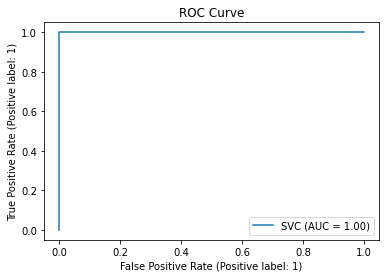

In [117]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc,xtest,ytest)
plt.title('ROC Curve')
plt.show()

AUC-ROC Curve shows that the model performs 100% well.

Area Under Curve is 100% fit. So the model has good performance

# Save The Model

In [118]:
import pickle
filename= 'Insurance.pkl'
pickle.dump(svc,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [119]:
x=np.array(ytest)
predicted= np.array(svc.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,1,0
7,1,1
8,1,1
9,0,0


The predicted results are nearly equal to the actual results. The model gave good performance.